# <a id='toc1_'></a>[I. Data Cleaning](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [I. Data Cleaning](#toc1_)    
    - [Import Libraries and PyPower.py](#toc1_1_1_)    
    - [Data source: OTTER](#toc1_1_2_)    
      - [DataFrame analysis and cleanup](#toc1_1_2_1_)    
    - [Data source: DELIVERECT](#toc1_1_3_)    
      - [DataFrame analysis and cleanup](#toc1_1_3_1_)    
    - [Export clean DataFrames](#toc1_1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_1_'></a>[Import Libraries and PyPower.py](#toc0_)

In [1]:
import pandas as pd
from sys import displayhook
import sys
sys.path.append('../Python')
from PyPower import *

### <a id='toc1_1_2_'></a>[Data source: OTTER](#toc0_)

#### <a id='toc1_1_2_1_'></a>[DataFrame analysis and cleanup](#toc0_)

In [2]:
otter = pd.read_csv('../../data/0-raw/otter_all.csv')
otter_original_shape= otter.shape
otter.head()

,Unnamed: 0,Fecha,Marca,Locación,Canal,ID de la orden,Estado de la orden,Subtotal,Impuesto,Descuentos,Cargos por error en el pedido,Código de moneda
0,0,2023-11-03 15:55:55,Umbrella SH,EMEA - SP - MAD - Tetuan,justeat,138656463,Nuevo,10,0,0,0,EUR
1,1,2023-11-03 15:49:40,Umbrella SH,EMEA - SP - MAD - Tetuan,justeat,138656912,Nuevo,"22,4",0,0,0,EUR
2,2,2023-11-03 15:49:02,Umbrella SH,EMEA - SP - MAD - Tetuan,glovo,MSDGW9UM,Entregado,"10,4",0,0,0,EUR
3,3,2023-11-03 15:48:41,Umbrella SH,Umbrella SH - Calle Linares,ubereats,8D40B,Nuevo,"36,6",0,"-13,9",0,EUR
4,4,2023-11-03 15:44:25,Umbrella SH,Goleta,ubereats,DF131,Entregado,"31,8",0,"-13,9",0,EUR


'N nan cols: 1'

Marca    1.123596
dtype: float64

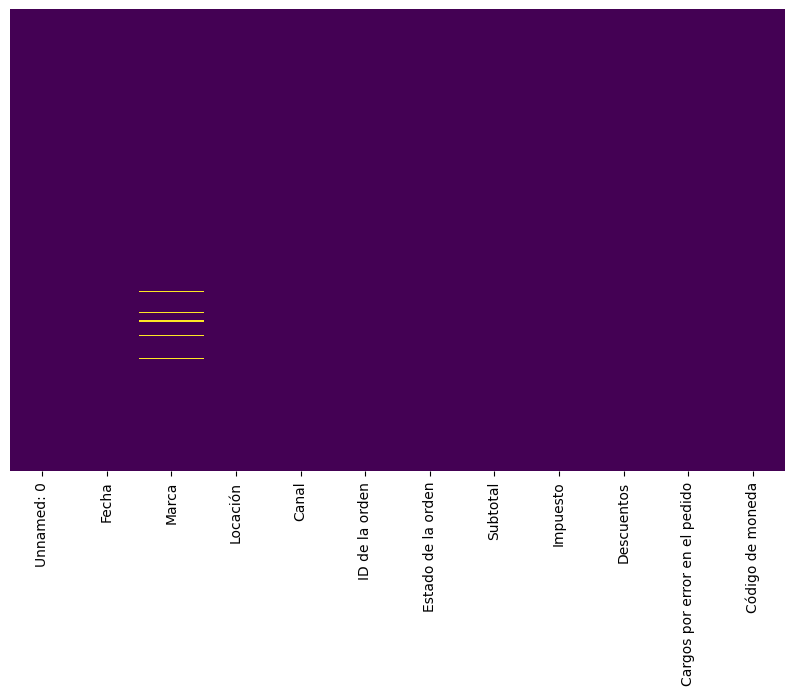

In [3]:
# pypower's method for evaluating nulls

check_nan(otter)

In [4]:
otter.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,534.0,NaN,NaN,NaN,266.5,154.296792,0.0,133.25,266.5,399.75,533.0
Fecha,534,530,2023-11-01 20:23:57,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marca,528,3,Umbrella SH,443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Locación,534,8,EMEA - SP - MAD - Tetuan,132,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canal,534,4,ubereats,353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID de la orden,534,534,138656463,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Estado de la orden,534,3,Entregado,464,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Subtotal,534,253,"31,8",35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Impuesto,534,18,0,517,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Descuentos,534,13,0,315,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Unifying columns with a pypower method

column_unification(otter)

,unnamed:_0,fecha,marca,locación,canal,id_de_la_orden,estado_de_la_orden,subtotal,impuesto,descuentos,cargos_por_error_en_el_pedido,código_de_moneda
0,0,2023-11-03 15:55:55,Umbrella SH,EMEA - SP - MAD - Tetuan,justeat,138656463,Nuevo,10,0,0,0,EUR
1,1,2023-11-03 15:49:40,Umbrella SH,EMEA - SP - MAD - Tetuan,justeat,138656912,Nuevo,"22,4",0,0,0,EUR
2,2,2023-11-03 15:49:02,Umbrella SH,EMEA - SP - MAD - Tetuan,glovo,MSDGW9UM,Entregado,"10,4",0,0,0,EUR
3,3,2023-11-03 15:48:41,Umbrella SH,Umbrella SH - Calle Linares,ubereats,8D40B,Nuevo,"36,6",0,"-13,9",0,EUR
4,4,2023-11-03 15:44:25,Umbrella SH,Goleta,ubereats,DF131,Entregado,"31,8",0,"-13,9",0,EUR
...,...,...,...,...,...,...,...,...,...,...,...,...
529,529,2023-11-01 13:16:20,Tepuy Basics,Umbrella SH - San Vicent del Raspeig,glovo,A5Y6DMMF,Entregado,"17,1",0,0,0,EUR
530,530,2023-11-01 13:15:34,Umbrella SH,Umbrella SH - San Vicent del Raspeig,ubereats,B3660,Entregado,"22,8",0,0,0,EUR
531,531,2023-11-01 13:10:23,Umbrella SH,Goleta,ubereats,CCC9C,Entregado,"17,2",0,0,0,EUR
532,532,2023-11-01 13:09:12,Umbrella SH,Umbrella SH - Calle Linares,ubereats,A736D,Entregado,"42,8",0,"-13,9",0,EUR


In [6]:
#Deleting constant columns
otter.drop(columns=['unnamed:_0', 'cargos_por_error_en_el_pedido', 'código_de_moneda'], inplace=True)
print(otter_original_shape[1]-otter.shape[1], 'columns deleted')

3 columns deleted


In [7]:
#Rename some of them 

columns_to_rename= {'locación':'local',
                      'id_de_la_orden': 'id_orden',
                      'estado_de_la_orden': 'estado_orden',
                      'descuentos': 'descuento'}


otter = rename_columns(otter, columns_to_rename)

In [8]:
otter.describe(include='all')

,fecha,marca,local,canal,id_orden,estado_orden,subtotal,impuesto,descuento
count,534,528,534,534,534,534,534,534,534
unique,530,3,8,4,534,3,253,18,13
top,2023-11-01 20:23:57,Umbrella SH,EMEA - SP - MAD - Tetuan,ubereats,138656463,Entregado,"31,8",0,0
freq,2,443,132,353,1,464,35,517,315


In [9]:
otter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   fecha         534 non-null    object
 1   marca         528 non-null    object
 2   local         534 non-null    object
 3   canal         534 non-null    object
 4   id_orden      534 non-null    object
 5   estado_orden  534 non-null    object
 6   subtotal      534 non-null    object
 7   impuesto      534 non-null    object
 8   descuento     534 non-null    object
dtypes: object(9)
memory usage: 37.7+ KB


### <a id='toc1_1_3_'></a>[Data source: DELIVERECT](#toc0_)

#### <a id='toc1_1_3_1_'></a>[DataFrame analysis and cleanup](#toc0_)

In [10]:
deliverect_just_eat = pd.read_csv('../../data/0-raw/202310_deliverect.csv')

deliverect_original_shape= deliverect_just_eat.shape

deliverect_just_eat.head()

,PickupTime,PickupTimeUTC,CreatedTime,CreatedTimeUTC,ScheduledTime,ScheduledTimeUTC,Location,OrderID,Channel,Status,...,DiscountTotal,Tip,DriverTip,SubTotal,Brands,ChannelLink,Tax,VAT,FailureMessage,IsTestOrder
0,2023-10-31 22:46:15+0100,2023-10-31 21:46:15,2023-10-31 22:31:15+0100,2023-10-31 21:31:15,NaN,NaN,Alicante - Bazan,138509659,Just Eat,ACCEPTED,...,0.0,0.0,0.0,83.4,NaN,Just Eat,0.0,7.57,NaN,False
1,2023-10-31 22:16:25+0100,2023-10-31 21:16:25,2023-10-31 22:02:26+0100,2023-10-31 21:02:26,NaN,NaN,Alicante - Periodista Rodolfo Salazar,138502564,Just Eat,DELIVERED,...,0.0,0.0,0.0,39.9,NaN,Just Eat,0.0,3.62,NaN,False
2,2023-10-29 21:34:14+0100,2023-10-29 20:34:14,2023-10-29 21:20:15+0100,2023-10-29 20:20:15,NaN,NaN,Alicante - Periodista Rodolfo Salazar,138409768,Just Eat,DELIVERED,...,0.0,0.0,0.0,29.1,NaN,Just Eat,0.0,2.65,NaN,False
3,2023-10-29 21:07:09+0100,2023-10-29 20:07:09,2023-10-29 20:53:10+0100,2023-10-29 19:53:10,NaN,NaN,Alicante - Periodista Rodolfo Salazar,138402233,Just Eat,DELIVERED,...,0.0,0.0,0.0,17.7,NaN,Just Eat,0.0,1.61,NaN,False
4,2023-10-29 20:42:17+0100,2023-10-29 19:42:17,2023-10-29 20:28:17+0100,2023-10-29 19:28:17,NaN,NaN,Alicante - Periodista Rodolfo Salazar,138390234,Just Eat,DELIVERED,...,0.0,0.0,0.0,13.0,NaN,Just Eat,0.0,1.19,NaN,False


'N nan cols: 6'

ScheduledTime       100.000000
ScheduledTimeUTC    100.000000
Voucher             100.000000
Note                 93.548387
Brands              100.000000
FailureMessage      100.000000
dtype: float64

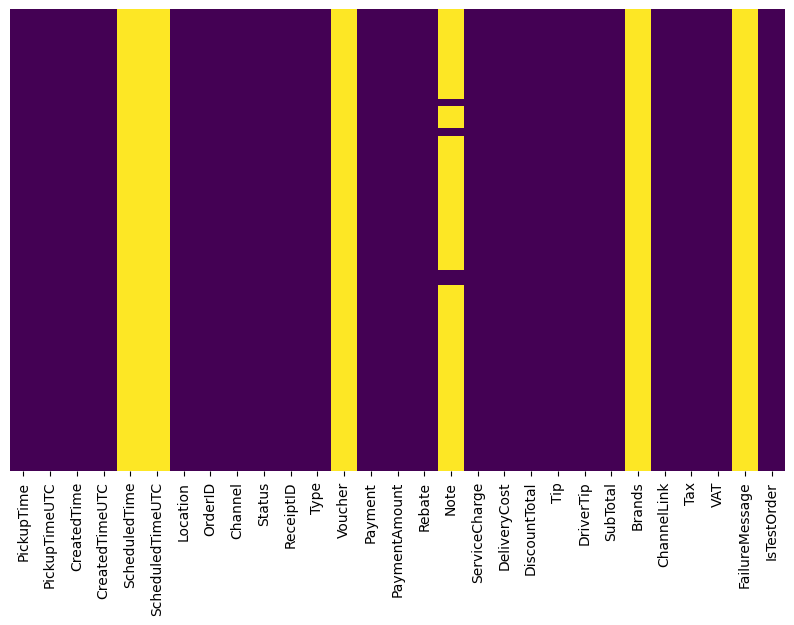

In [11]:
check_nan(deliverect_just_eat)

In [12]:
# Delete all nan columns

deliverect_just_eat.dropna(axis=1 , inplace=True)
print(deliverect_original_shape[1]-deliverect_just_eat.shape[1], 'columns deleted')

6 columns deleted


In [13]:
deliverect_just_eat.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PickupTime,62,62,2023-10-31 22:46:15+0100,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PickupTimeUTC,62,62,2023-10-31 21:46:15,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreatedTime,62,62,2023-10-31 22:31:15+0100,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreatedTimeUTC,62,62,2023-10-31 21:31:15,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,62,2,Alicante - Bazan,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OrderID,62.0,NaN,NaN,NaN,137734998.919355,473398.67669,136902245.0,137338646.5,137889470.5,138040399.0,138509659.0
Channel,62,1,Just Eat,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,62,2,DELIVERED,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ReceiptID,62.0,NaN,NaN,NaN,12.33871,9.10043,1.0,6.0,10.0,16.25,36.0
Type,62,2,DELIVERY,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Unifying columns with a pypower method

column_unification(deliverect_just_eat)

,pickuptime,pickuptimeutc,createdtime,createdtimeutc,location,orderid,channel,status,receiptid,type,...,servicecharge,deliverycost,discounttotal,tip,drivertip,subtotal,channellink,tax,vat,istestorder
0,2023-10-31 22:46:15+0100,2023-10-31 21:46:15,2023-10-31 22:31:15+0100,2023-10-31 21:31:15,Alicante - Bazan,138509659,Just Eat,ACCEPTED,11,DELIVERY,...,0.0,1.99,0.0,0.0,0.0,83.4,Just Eat,0.0,7.57,False
1,2023-10-31 22:16:25+0100,2023-10-31 21:16:25,2023-10-31 22:02:26+0100,2023-10-31 21:02:26,Alicante - Periodista Rodolfo Salazar,138502564,Just Eat,DELIVERED,11,DELIVERY,...,0.0,1.99,0.0,0.0,0.0,39.9,Just Eat,0.0,3.62,False
2,2023-10-29 21:34:14+0100,2023-10-29 20:34:14,2023-10-29 21:20:15+0100,2023-10-29 20:20:15,Alicante - Periodista Rodolfo Salazar,138409768,Just Eat,DELIVERED,8,DELIVERY,...,0.0,1.99,0.0,0.0,0.0,29.1,Just Eat,0.0,2.65,False
3,2023-10-29 21:07:09+0100,2023-10-29 20:07:09,2023-10-29 20:53:10+0100,2023-10-29 19:53:10,Alicante - Periodista Rodolfo Salazar,138402233,Just Eat,DELIVERED,7,DELIVERY,...,0.0,1.99,0.0,0.0,0.0,17.7,Just Eat,0.0,1.61,False
4,2023-10-29 20:42:17+0100,2023-10-29 19:42:17,2023-10-29 20:28:17+0100,2023-10-29 19:28:17,Alicante - Periodista Rodolfo Salazar,138390234,Just Eat,DELIVERED,6,DELIVERY,...,0.0,2.99,0.0,0.0,0.0,13.0,Just Eat,0.0,1.19,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2023-10-03 21:27:57+0200,2023-10-03 19:27:57,2023-10-03 21:13:58+0200,2023-10-03 19:13:58,Alicante - Periodista Rodolfo Salazar,137026252,Just Eat,DELIVERED,6,DELIVERY,...,0.0,1.99,0.0,0.0,0.0,30.9,Just Eat,0.0,2.81,False
58,2023-10-01 18:09:55+0200,2023-10-01 16:09:55,2023-10-01 17:54:56+0200,2023-10-01 15:54:56,Alicante - Bazan,136925115,Just Eat,DELIVERED,11,DELIVERY,...,0.0,1.99,0.0,0.0,0.0,40.7,Just Eat,0.0,3.70,False
59,2023-10-01 16:09:36+0200,2023-10-01 14:09:36,2023-10-01 15:54:36+0200,2023-10-01 13:54:36,Alicante - Bazan,136920156,Just Eat,DELIVERED,10,DELIVERY,...,0.0,1.99,0.0,0.0,0.0,18.9,Just Eat,0.0,1.73,False
60,2023-10-01 14:43:05+0200,2023-10-01 12:43:05,2023-10-01 14:29:06+0200,2023-10-01 12:29:06,Alicante - Periodista Rodolfo Salazar,136909515,Just Eat,DELIVERED,8,DELIVERY,...,0.0,1.99,0.0,0.0,0.0,17.6,Just Eat,0.0,1.60,False


In [15]:
deliverect_just_eat.istestorder.value_counts()

istestorder
False    62
Name: count, dtype: int64

In [16]:
#Delete not relevant and constant columns
deliverect_just_eat.drop(columns=['pickuptime', 'pickuptimeutc', 'createdtime', 'receiptid', 'rebate', 'servicecharge', 'channellink', 'istestorder', 'tax'], inplace=True)
print(deliverect_original_shape[1]-deliverect_just_eat.shape[1], 'columns deleted')

15 columns deleted


In [17]:
deliverect_just_eat.head()

,createdtimeutc,location,orderid,channel,status,type,payment,paymentamount,deliverycost,discounttotal,tip,drivertip,subtotal,vat
0,2023-10-31 21:31:15,Alicante - Bazan,138509659,Just Eat,ACCEPTED,DELIVERY,CARD,85.39,1.99,0.0,0.0,0.0,83.4,7.57
1,2023-10-31 21:02:26,Alicante - Periodista Rodolfo Salazar,138502564,Just Eat,DELIVERED,DELIVERY,CARD,41.89,1.99,0.0,0.0,0.0,39.9,3.62
2,2023-10-29 20:20:15,Alicante - Periodista Rodolfo Salazar,138409768,Just Eat,DELIVERED,DELIVERY,CARD,31.09,1.99,0.0,0.0,0.0,29.1,2.65
3,2023-10-29 19:53:10,Alicante - Periodista Rodolfo Salazar,138402233,Just Eat,DELIVERED,DELIVERY,CARD,19.69,1.99,0.0,0.0,0.0,17.7,1.61
4,2023-10-29 19:28:17,Alicante - Periodista Rodolfo Salazar,138390234,Just Eat,DELIVERED,DELIVERY,CARD,15.99,2.99,0.0,0.0,0.0,13.0,1.19


### <a id='toc1_1_4_'></a>[Export clean DataFrames](#toc0_)

In [18]:
otter.to_csv('../../data/1-clean/otter_clean.csv', index=False)
deliverect_just_eat.to_csv('../../data/1-clean/deliverect_clean.csv', index=False)